$$\require{mhchem}$$

# Transient CSTR (12 pt)

Consider the reaction:
\begin{align*}
\ce{A + 2B -> C}
\end{align*}

Assume this is a liquid phase CSTR, initially filled with only $C_A=1$M. The CSTR is 50 L and and the flow rate is 5 L/min. The inlet stream contains $C_A=5$M and $C_B=10$M. The reaction is elementary with $k_1=0.1$/min/M$^2$.

## Solve and plot for the transient concentration profile of reactants and product from t=0 to 50 min.

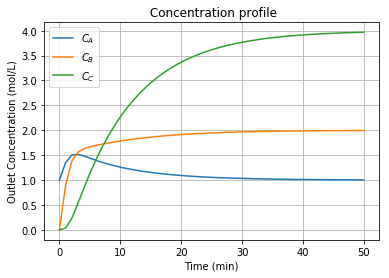

In [2]:
import numpy as np
from scipy.integrate import solve_ivp

v = 5   # L/min
V = 50  # L
tau = V/v # min
k = 0.1 # 1/min-M^2

C0 = [1, 0, 0]   # M
Cin = [5, 10, 0] # M/min
Fin = v * Cin    # mol/min
Ft_in = sum(Fin) # mol/min

def dCdt(t, C):
    Ca, Cb, Cc = C
    rate = k * Ca * Cb**2
    dCadt = (Cin[0] - Ca) / tau - rate
    dCbdt = (Cin[1] - Cb) / tau - 2 * rate
    dCcdt = (Cin[2] - Cc) / tau + rate
    return [dCadt, dCbdt, dCcdt]
    
teval = np.linspace(0.0, 50.0, 50)
tspan = (0, 50)
CSTR1 = solve_ivp(dCdt, tspan, C0, t_eval = teval)
#Ft_in = sum(Fin)
C_A = CSTR1.y[0]
C_B = CSTR1.y[1]
C_C = CSTR1.y[2]

import matplotlib.pyplot as plt
plt.plot(teval, C_A, label = '$C_A$')
plt.plot(teval, C_B, label = '$C_B$')
plt.plot(teval, C_C, label = '$C_C$')
plt.xlabel('Time (min)')
plt.title(' Concentration profile')
plt.ylabel('Outlet Concentration (mol/L)')
plt.legend()
plt.grid()
plt.show()

## Now consider two reactors in series. Each has the same volume as the original reactor and has the same initial conditions. The outlet of the first reactor goes to the inlet of the second. Write the mole balances for each species in each tank

\begin{align*}
\ce{A + 2B -> C} 
\end{align*}

In both the reactors, the initial conditions are:
$C_A = 1 M, C_B = 0 M,  C_C = 0 M$

### Reactor 1
Mole balance:
\begin{align*}
\ \frac{dN_i}{dt}^{(1)} = F_{in, i} ^{(1)} - F_{out, i} ^{(1)} + r_i\times \alpha_i dV
\end{align*}
where: i = chemical A, B or C;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $F_{in, i} ^{(1)}$ = Inlet concentration of $i^{th}$ component in reactor 1, 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\alpha_i$ = Stoicihiometric Coefficient


### Reactor 2

Similarly to above, the mole balance in this reactor is:
\begin{align*}
\ \frac{dN_i}{dt}^{(2)} = F_{out, i} ^{(1)} - F_{out, i} ^{(2)} + r_i\times \alpha_i dV
\end{align*}
Since, $F_{in, i} ^{(2)} = F_{out, i} ^{(1)}$

## Next, solve for the concentration profile in each. Plot the concentration profiles in separate plots side-by-side from t = 0 to 50 min (left for the first reactor, right for the second reactor)

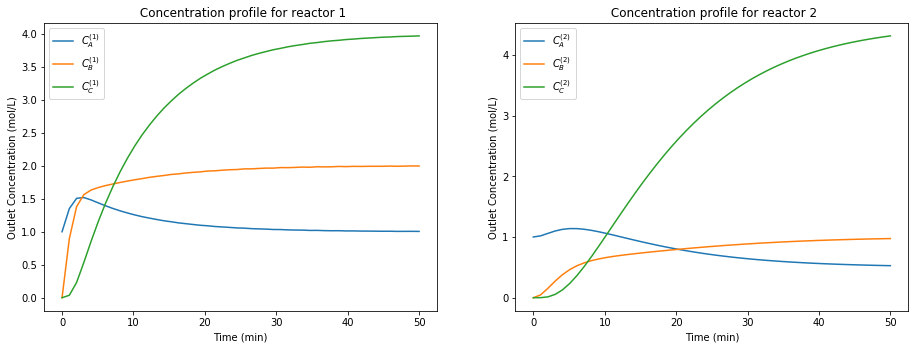

In [3]:
import numpy as np
from scipy.integrate import solve_ivp

v = 5   # L/min
V = 50  # L
tau = V/v # min
k = 0.1 # 1/min-M^2

Cinitial = C0 + C0   # M
Cin = [5, 10, 0] # M/min
Fin = v * Cin    # mol/min
Ft_in = sum(Fin) # mol/min

def dCdt(t, C):
    Ca1, Cb1, Cc1, Ca2, Cb2, Cc2 = C
    r1 = k * Ca1 * Cb1**2
    dCa1dt = (Cin[0] - Ca1) / tau - r1
    dCb1dt = (Cin[1] - Cb1) / tau - 2 * r1
    dCc1dt = (Cin[2] - Cc1) / tau + r1
    
    r2 = k * Ca2 * Cb2**2
    dCa2dt = (Ca1 - Ca2) / tau - r2
    dCb2dt = (Cb1 - Cb2) / tau - 2 * r2
    dCc2dt = (Cc1 - Cc2) / tau + r2
    return [dCa1dt, dCb1dt, dCc1dt, dCa2dt, dCb2dt, dCc2dt]
    
teval = np.linspace(0.0, 50.0)
tspan = (0, 50)
CSTR2 = solve_ivp(dCdt, tspan, Cinitial, t_eval = teval)
#Ft_in = sum(Fin)
CA1 = CSTR2.y[0] 
CB1 = CSTR2.y[1]
CC1 = CSTR2.y[2]
CA2 = CSTR2.y[3]
CB2 = CSTR2.y[4]
CC2 = CSTR2.y[5]

import matplotlib.pyplot as plt

# Reactor 1
plt.subplot(1,2,1)
plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=1.0)
plt.plot(teval, CA1, label = '$C_A^{(1)}$')
plt.plot(teval, CB1, label = '$C_B^{(1)}$')
plt.plot(teval, CC1, label = '$C_C^{(1)}$')
plt.xlabel('Time (min)')
plt.ylabel('Outlet Concentration (mol/L)')
plt.title(' Concentration profile for reactor 1')
plt.legend()

# Reactor 2
plt.subplot(1,2,2)
plt.plot(teval, CA2, label = '$C_A^{(2)}$')
plt.plot(teval, CB2, label = '$C_B^{(2)}$')
plt.plot(teval, CC2, label = '$C_C^{(2)}$')
plt.title(' Concentration profile for reactor 2')
plt.xlabel('Time (min)')
plt.ylabel('Outlet Concentration (mol/L)')
plt.legend()
plt.show()

## Does the profiles of the first tank in this new system match the answer from 1.1? Should it?

Yes, as expected the profile remains the same since the first reactor's concentration profile is independent of the second reactor since the second CSTR in series just takes the outlet of the $1^{st}$ CSTR as its inlet. However, concentration profile  of the second reactor is dependent on the outlet of first reactor.

## For the same reaction, solve for the concentration of a semi-batch system, starting with 20L with $C_A=1$M with no outlet stream. Plot  concentrations from t=0 to 6min (the point when it hits 50 L).

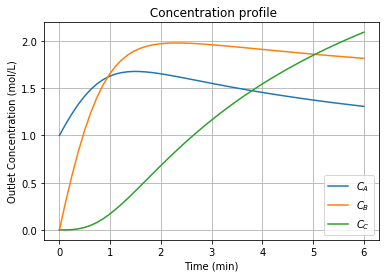

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

v = 5   # L/min
V0 = 20  # L
k = 0.1 # 1/min-M^2
Alpha = [-1, -2, 1]
C0 = [1, 0, 0, 20]   # M
Cin = np.array([5, 10, 0]) # M/min
Fin = v * Cin    # mol/min
Ft_in = sum(Fin) # mol/min

def dC2dt(t, C):
    V = V0 + v * t
    #tau = V/v # min
    Ca, Cb, Cc, V = C
    rate = k * Ca * Cb**2 
    dCadt = (1/V) * (Fin[0] + Alpha[0] * V * rate - Ca * v)
    dCbdt = (1/V) * (Fin[1] + Alpha[1] * V * rate - Cb * v)
    dCcdt = (1/V) * (Fin[2] + Alpha[2] * V * rate - Cc * v)
    dVdt = v
    return [dCadt, dCbdt, dCcdt, dVdt]

    
teval2 = np.linspace(0.0, 6.0, 50)
tspan = (0, 6)
CSTR3 = solve_ivp(dC2dt, tspan, C0, t_eval = teval2)
#Ft_in = sum(Fin)
C_a = CSTR3.y[0]
C_b = CSTR3.y[1]
C_c = CSTR3.y[2]

plt.plot(teval2, C_a, label = '$C_A$')
plt.plot(teval2, C_b, label = '$C_B$')
plt.plot(teval2, C_c, label = '$C_C$')
plt.xlabel('Time (min)')
plt.title(' Concentration profile')
plt.ylabel('Outlet Concentration (mol/L)')
plt.legend()
plt.grid()
plt.show()

## Plot the concentrations of product over time (from t=0 to 50 min) with the CSTR (1.1) compared with the semi-batch reactor. Which is higher? Why?

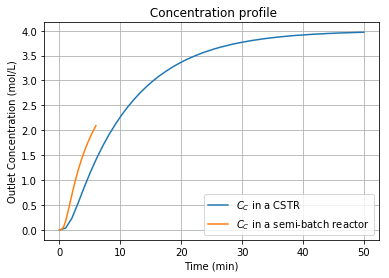

In [5]:
import matplotlib.pyplot as plt

plt.plot(teval, C_C, label = '$C_C$ in a CSTR')
plt.plot(teval2, C_c, label = '$C_C$ in a semi-batch reactor')
plt.xlabel('Time (min)')
plt.title(' Concentration profile')
plt.ylabel('Outlet Concentration (mol/L)')
plt.legend()
plt.grid()
plt.show()

It's observed that the semi-batch reactor has higher conversion upto 6 minutes compared to the transient CSTR. 
This is because in the semi-batch reactor, we already have A present and initially, concentration of B is the rate  determining component. Also, in semi-batch reactors, the reactants don't escape and hence the unreacted A and B accumulate to react and produce C whereas in CSTR, since there is continuous flow, the excess gets purged out at exit.

However, semi-batch reactor cannot work as long as CSTR since there is no exit flow and the tank gets filled. Thus, the CSTR eventually is able to achieve higher product concentration of 4 M, almost double of what we were able to achieve for the semi-batch reactor till it got filled.

# Try solving the second problem from the first exam last year (the core/shell PFR). (6 pts)

Like last week, try to do this without looking at the solutions. We aren't going to grade this for accuracy since you already have the solutions, just whether you submit something that isn't a line-by-line copy of the answers.

We are looking to design a liquid phase membrane PFR (V=10L) with three channels for the rection system:
\begin{align}
\ce{A + B -> 4C}, k_1=0.1/M/s\\
\ce{A + C -> 3D}, k_2=0.5/M/s
\end{align}
The inner channel contains a feed of pure A with a concentration of 1M and flow rate of 2 L/s. A is very large and cannot pass any membrane. B,C,D can pass the first membrane ($k_{b,1}'=0.2/s,k_{c,1}'=0.4/s,k_{d,1}'=0.5/s$).  C,D are very small and can also pass the outer membrane ($k_{c,2}'=0.5/s,k_{d,2}'=0.7/s$). You may assume the volumetric flow rates are constant.  
![img](E1P2.png)

## How many unique species concentrations are there?

There are 9 unique species concentrations (4 innermost, 3 in first membrane, and 2 in outermost section of the PFR).

## Write the mol balance for each of the species.  


Let the concentration of $i^{th}$ component in different sections be represented as: $C_{i,1}$ for innermost, $C_{i,2}$ for middle, and $C_{i,3}$ for the outermost section rescpectively.

**Innermost section**

The 4 mole balances here are:
1. $\displaystyle\frac{dF_{A,1}}{dV}$ = $-k_1C_{A,1}C_{B,1} -k_2C_{A,1}C_{C,1}$
2. $\displaystyle\frac{dF_{B,1}}{dV}$ = $-k_1C_AC_B$ $-k_{b,1}'[C_{B,1}-C_{B,2}]$
3. $\displaystyle\frac{dF_{C,1}}{dV}$ = $4 k_1C_AC_B -k_2C_AC_C-k_{c,1}'[C_{C,1}-C_{C,2}]$
4. $\displaystyle\frac{dF_{D,1}}{dV}$ = $3k_2C_AC_C -k_{d,1}'[C_{D,1}-C_{D,2}]$

**Middle section**

Since the flow is in opposite direction, adding a $'-'$ sign returns the correct differential equations. The 3 mole balances here are:
1. $\displaystyle\frac{dF_{B,2}}{dV}$ = $-(k_{b,1}'[C_{B,1}-C_{B,2}])$
2. $\displaystyle\frac{dF_{C,2}}{dV}$ = $-(k_{c,1}'[C_{C,1}-C_{C,2}] - k_{c,2}'[C_{C,2}-C_{C,3}])$
3. $\displaystyle\frac{dF_{D,2}}{dV}$ = $-(k_{d,1}'[C_{D,1}-C_{D,2}] - k_{d,2}'[C_{D,2}-C_{D,3}])$

**Outermost section**

The 2 mole balances here are:
1. $\displaystyle\frac{dF_{C,3}}{dV}$ = $k_{c,2}'[C_{C,2}-C_{C,3}]$
2. $\displaystyle\frac{dF_{D,3}}{dV}$ = $k_{d,2}'[C_{D,2}-C_{D,3}]$

## Solve for and plot the concentration profiles for each species along the length of the reactor

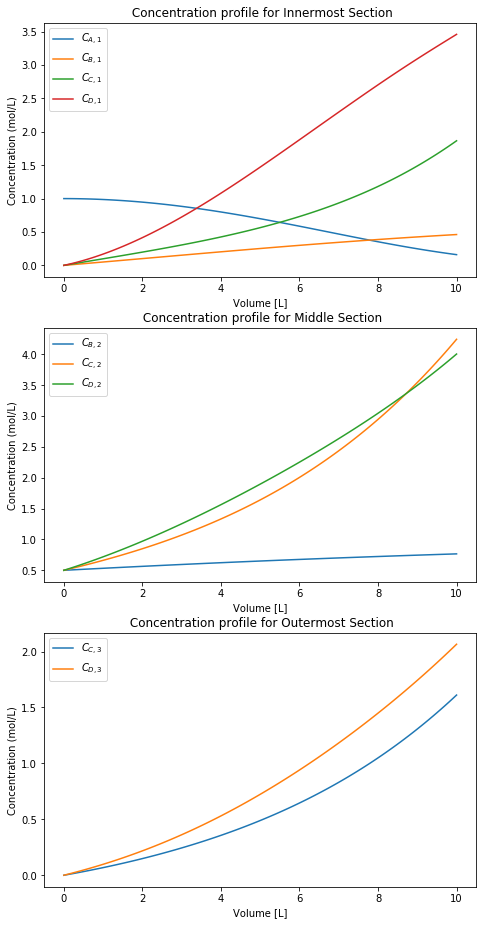

In [20]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

k1 = 0.1   # L/mol/s
k2 = 0.5   # L/mol/s
kb1 = 0.2  # 1/s
kc1 = 0.4  # 1/s
kd1 = 0.5  # 1/s
kc2 = 0.5  # 1/s
kd2 = 0.7  # 1/s
Alp1 = [-1,-1, 4, 0]
Alp2 = [-1, 0, -1, 3]
v1 = 2   # L/s
v2 = 3   # L/s
v3 = 4   # L/s
C0 = [1, 0, 0, 0, 0.5, 0.5, 0.5, 0, 0]   # mol/L

def dCdV(V, C):
    CA1, CB1, CC1, CD1, CB2, CC2, CD2, CC3, CD3 = C
   
    # Rates (in mol/L-s)
    
    # Reaction rates 
    R1 = k1*CA1*CB1
    R2 = k2*CA1*CC1
    
    # Rate of mass transfer
    RB1 = kb1*(CB2-CB1)
    RC1 = kc1*(CC2-CC1)
    RD1 = kd1*(CD2-CD1)
    RC2 = kc2*(CC3-CC2)
    RD2 = kd2*(CD3-CD2)
    
    # Calculate the differentials for each species in each compartment
    dA1dV = (Alp1[0] * R1 + Alp2[0] * R2) / v1
    dB1dV = (RB1 - Alp1[1] * R1) / v1
    dC1dV = (Alp1[2] * R1 + Alp2[2] * R2 + RC1) / v1
    dD1dV = (Alp2[3] * R2 + RD1) / v1
    dB2dV = -(-RB1) / v2
    dC2dV = -(-RC1 + RC2) / v2
    dD2dV = -(-RD1 + RD2) / v2
    dC3dV = -RC2 / v3
    dD3dV = -RD2 / v3
    
    return [dA1dV, dB1dV, dC1dV, dD1dV, dB2dV, dC2dV, dD2dV, dC3dV, dD3dV]

V = 10   # L
Veval = np.linspace(0, 10, 100)
PFR = solve_ivp(dCdV, [0, 10], C0, t_eval = Veval)

CA1 = PFR.y[0]
CB1 = PFR.y[1]
CC1 = PFR.y[2]
CD1 = PFR.y[3]
CB2 = PFR.y[4]
CC2 = PFR.y[5]
CD2 = PFR.y[6]
CC3 = PFR.y[7]
CD3 = PFR.y[8]

# Plots of different sections 

# Innermost Section
plt.subplot(3,1,1)
plt.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=3.0)
plt.plot(Veval, CA1, label = '$C_{A,1}$')
plt.plot(Veval, CB1, label = '$C_{B,1}$')
plt.plot(Veval, CC1, label = '$C_{C,1}$')
plt.plot(Veval, CD1, label = '$C_{D,1}$')
plt.xlabel('Volume [L]')
plt.ylabel('Concentration (mol/L)')
plt.title(' Concentration profile for Innermost Section')
plt.legend()

# Middle Section
plt.subplot(3,1,2)
plt.plot(Veval, CB2, label = '$C_{B,2}$')
plt.plot(Veval, CC2, label = '$C_{C,2}$')
plt.plot(Veval, CD2, label = '$C_{D,2}$')
plt.title(' Concentration profile for Middle Section')
plt.xlabel('Volume [L]')
plt.ylabel('Concentration (mol/L)')
plt.legend()
#plt.show()


# Outermost Section
plt.subplot(3,1,3)
plt.plot(Veval, CC3, label = '$C_{C,3}$')
plt.plot(Veval, CD3, label = '$C_{D,3}$')
plt.title(' Concentration profile for Outermost Section')
plt.xlabel('Volume [L]')
plt.ylabel('Concentration (mol/L)')
plt.legend()
plt.show()

# Reaction engineering questions (2 pt)

Ask one question on piazza.  Post the link here (for example, https://piazza.com/class/jl5aabbtksz62s?cid=190).

https://piazza.com/class/jl5aabbtksz62s?cid=230

## Bonus (1pt)

Answer someone else's question on Piazza. Post the link here.

https://piazza.com/class/jl5aabbtksz62s?cid=185